# Python functions for computing and plotting variogram models
Dongfang Qu, Univeristy of Copenhagen

Variogram measures the variability of pairs of data points at various spacing distances(i.e.lag). Variogram computation and modelling is an important tool for geospatial data analysis. There exist python tools for computing experimental variograms, e.g. geostatspy (https://github.com/GeostatsGuy/GeostatsPy). Here I developed python functions for computing and plotting variogram models, which can be used for fitting variogram models to the experimental variogram data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt   
import math

In [2]:
def spherical(h, r, C):
    '''
    Spherical model of the semivariogram
    h: lag distance
    r: variogram range, must be >0
    C: sill
    '''
    assert r>0, "r should be > 0"
    if h <= r:
        return C*( 1.5*h/r - 0.5*((h/r)**3.0) )
    else:
        return C
    
def gaussian(h,r,C):
    '''Gaussian model of the semivariogram'''
    assert r>0, "r should be > 0"
    
    return C*(1-math.exp(-3*((h/r)**2)))
    
    
def exponential(h, r, C):
    '''Exponential model of the semivariogram''' 
    assert r>0, "r should be > 0"
    
    return C*(1-math.exp(-3*h/r))
    
def variogram_model (C0,C1,s1,r1,C2,s2,r2,h_max,h_step, sill=1):
#C0- fraction of nugget effect
#C1, R1 - fraction, range of the 1st model
#C2, R2-fraction, range of the 2nd model
#r1, r2 must be larger than 0
    assert r1 > 0 and r2 > 0, "both r1 and r2 should be > 0"
    h = np.arange(0,h_max,h_step)
    vario = np.zeros(int(h_max/h_step))
    if s1 == 'spherical' and s2 == 'spherical':
        for i in range(0,int(h_max/h_step)):
            vario[i] = sill*(C0 + C1*spherical(h[i],r1,1) + C2*spherical(h[i],r2,1))
    if s1 == 'spherical' and s2 == 'gaussian':
        for i in range(0,int(h_max/h_step)):
            vario[i] = sill*(C0 + C1*spherical(h[i],r1,1) + C2*gaussian(h[i],r2,1))
    if s1 == 'spherical' and s2 == 'exponential':
        for i in range(0,int(h_max/h_step)):
            vario[i] = sill*(C0 + C1*spherical(h[i],r1,1) + C2*exponential(h[i],r2,1))
    if s1 == 'gaussian' and s2 == 'spherical':
        for i in range(0,int(h_max/h_step)):
            vario[i] = sill*(C0 + C1*gaussian(h[i],r1,1) + C2*spherical(h[i],r2,1))
    if s1 == 'gaussian' and s2 == 'gaussian':
        for i in range(0,int(h_max/h_step)):
            vario[i] = sill*(C0 + C1*gaussian(h[i],r1,1) + C2*gaussian(h[i],r2,1))
    if s1 == 'gaussian' and s2 == 'exponential':
        for i in range(0,int(h_max/h_step)):
            vario[i] = sill*(C0 + C1*gaussian(h[i],r1,1) + C2*exponential(h[i],r2,1))
    if s1 == 'exponential' and s2 == 'spherical':
        for i in range(0,int(h_max/h_step)):
            vario[i] = sill*(C0 + C1*exponential(h[i],r1,1) + C2*spherical(h[i],r2,1))
    if s1 == 'exponential' and s2 == 'gaussian':
        for i in range(0,int(h_max/h_step)):
            vario[i] = sill*(C0 + C1*exponential(h[i],r1,1) + C2*gaussian(h[i],r2,1))
    if s1 == 'exponential' and s2 == 'exponential':
        for i in range(0,int(h_max/h_step)):
            vario[i] = sill*(C0 + C1*exponential(h[i],r1,1) + C2*exponential(h[i],r2,1))
            
    plt.plot(h,vario)
    plt.xlabel('Lag(m)')
    plt.ylabel('Semivariogram')
      
    return h, vario
    

## Test

### (1) Pure nugget effect

C0=1, C1=0, C2=0

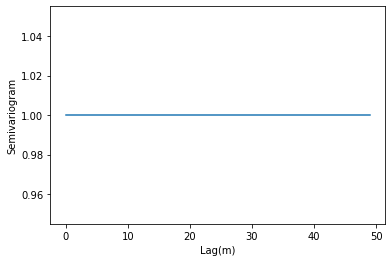

In [49]:
h,vario= variogram_model (C0=1,C1=0, s1='spherical',r1=1,C2=0, s2='spherical', r2=1,h_max=50,h_step=1, sill=1)

### (2) Nested variogram model, two variogram structures
0.2*nugget effect+0.8*spherical/gaussian/exponential model (range=30)

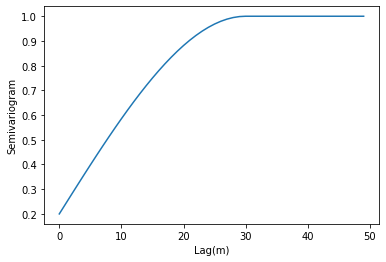

In [7]:
#0.2 nugget effect + 0.8 spherical model(range=30)
h,vario= variogram_model (C0=0.2,C1=0.8,s1='spherical',r1=30,C2=0,s2='spherical',r2=1,h_max=50,h_step=1, sill=1)

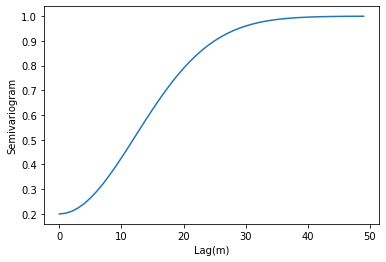

In [47]:
#0.2 nugget effect + 0.8 gaussian model(range=30)
h,vario= variogram_model (C0=0.2,C1=0.8,s1='gaussian',r1=30,C2=0,s2='spherical',r2=1,h_max=50,h_step=1, sill=1)

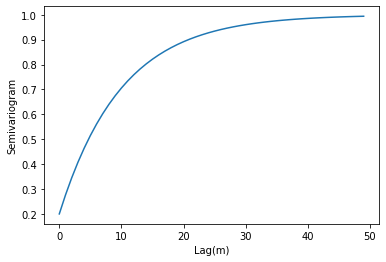

In [48]:
#0.2 nugget effect + 0.8 exponential(range=30)
h,vario= variogram_model (C0=0.2,C1=0.8,s1='exponential',r1=30,C2=0,s2='spherical',r2=1,h_max=50,h_step=1, sill=1)

### (3) Nested variogram model, three variogram structures
0.2 nugget effect + 0.5 gaussian model(range = 20) + 0.3 exponential model(range =50)

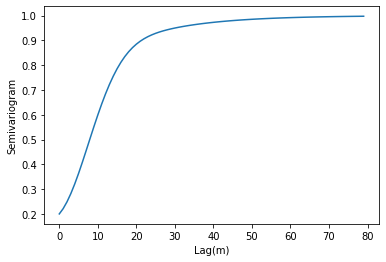

In [6]:
h, vario= variogram_model (C0=0.2,C1=0.5,s1='gaussian',r1=20,C2=0.3,s2='exponential',r2=50,h_max=80,h_step=1, sill=1)

## Example: Fitting a model to data

Now if you have experimental variogram data, you can find a variogram model that fits with the data by visualizing the models and the experimental data in the same plot.

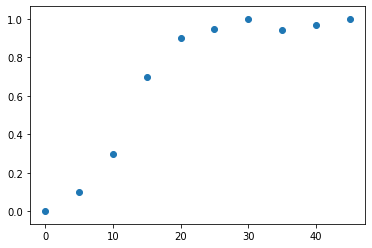

In [23]:
# Now I make up some experimental variogram data
experi_lag = np.arange(0, 50, 5)
experi_vario=[0, 0.1, 0.3, 0.7, 0.9, 0.95, 1.0, 0.94, 0.97, 1.0]
#visualize the data
plt.scatter(experi_lag, experi_vario)

Now let's try a gaussian variogram model with a range of 25 m, and plot it together with the experimental variogram data:

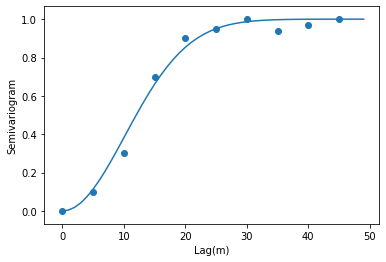

In [21]:
h1, vario1= variogram_model(C0=0,C1=1,s1='gaussian',r1=25,C2=0,s2='spherical',r2=1,h_max=50,h_step=1, sill=1)
plt.scatter(experi_lag, experi_vario)

Looks good!